C:\Users\soyun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-1-a0f5d4bdbc32>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-1-a0f5d4bdbc32>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-1-a0f5d4bdbc32>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-1-a0f5d4bdbc32>:48: DataConversionWarning: A column-vector y was p

훈련 세트 정확도: 0.961
테스트 세트 정확도: 0.658


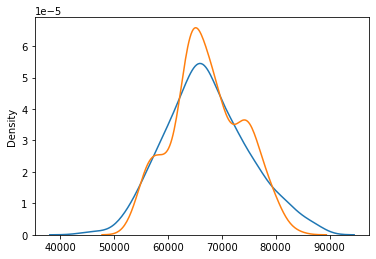

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data.csv', encoding = 'cp949')
del data['지역명']

input_num = pd.DataFrame(data, columns = ['평균기온(℃)', '평균풍속(m/s)', '평균습도(%rh)', '평균일강수량(mm)', '일사합'])
input_day = pd.DataFrame(data, columns = ['요일'])
y = pd.DataFrame(data, columns = ['최대전력(MW)'])

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 세트 변환
scaler.fit(input_num)
input_num = scaler.transform(input_num)

# ndarray -> dataframe
input_num = pd.DataFrame(input_num, columns = ['평균기온(℃)', '평균풍속(m/s)', '평균습도(%rh)', '평균일강수량(mm)', '일사합'])

# 요일 변환
encoder= LabelEncoder()
encoder.fit(input_day)
input_day= encoder.transform(input_day)
input_day = pd.DataFrame(input_day, columns = ['요일'])

input_num['일시'] = data['일시']
input_day['일시'] = data['일시']
input_num = input_num.set_index('일시')
input_day = input_day.set_index('일시')
y['일시'] = data['일시']
y = y.set_index('일시')

x = input_num.join(input_day)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

for i in range(50,200,10):
    model = RandomForestRegressor(n_estimators = 400, random_state = 0, max_features = 2, max_depth = 100)
    model.fit(x_train, y_train)
    
y_test_prediction = model.predict(x_test)

ax1 = sns.distplot(y_test, hist = False , label = "y_real")
ax2 = sns.distplot(y_test_prediction, hist = False, label = "y_predict", ax = ax1)

print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)) )